# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [72]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train_orig = train['features'], train['labels']
X_valid_orig, y_valid_orig = valid['features'], valid['labels']
X_test_orig, y_test_orig = test['features'], test['labels']


In [73]:
import csv
datafile = open('signnames.csv', 'r')
myreader = csv.reader(datafile)
next(myreader, None)
signnames = []
for row in myreader:
    print(row[0],row[1])
    signnames.append(row[1])


0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vehicles
16 Vehicles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vehicles over 3.5 metric tons


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [175]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_orig)

# TODO: Number of validation examples
n_validation = len(X_valid_orig)

# TODO: Number of testing examples.
n_test = len(X_test_orig)

n_valid = len(X_valid_orig)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_orig[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train_orig))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [75]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [76]:
import cv2
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
    
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

def to_gray(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

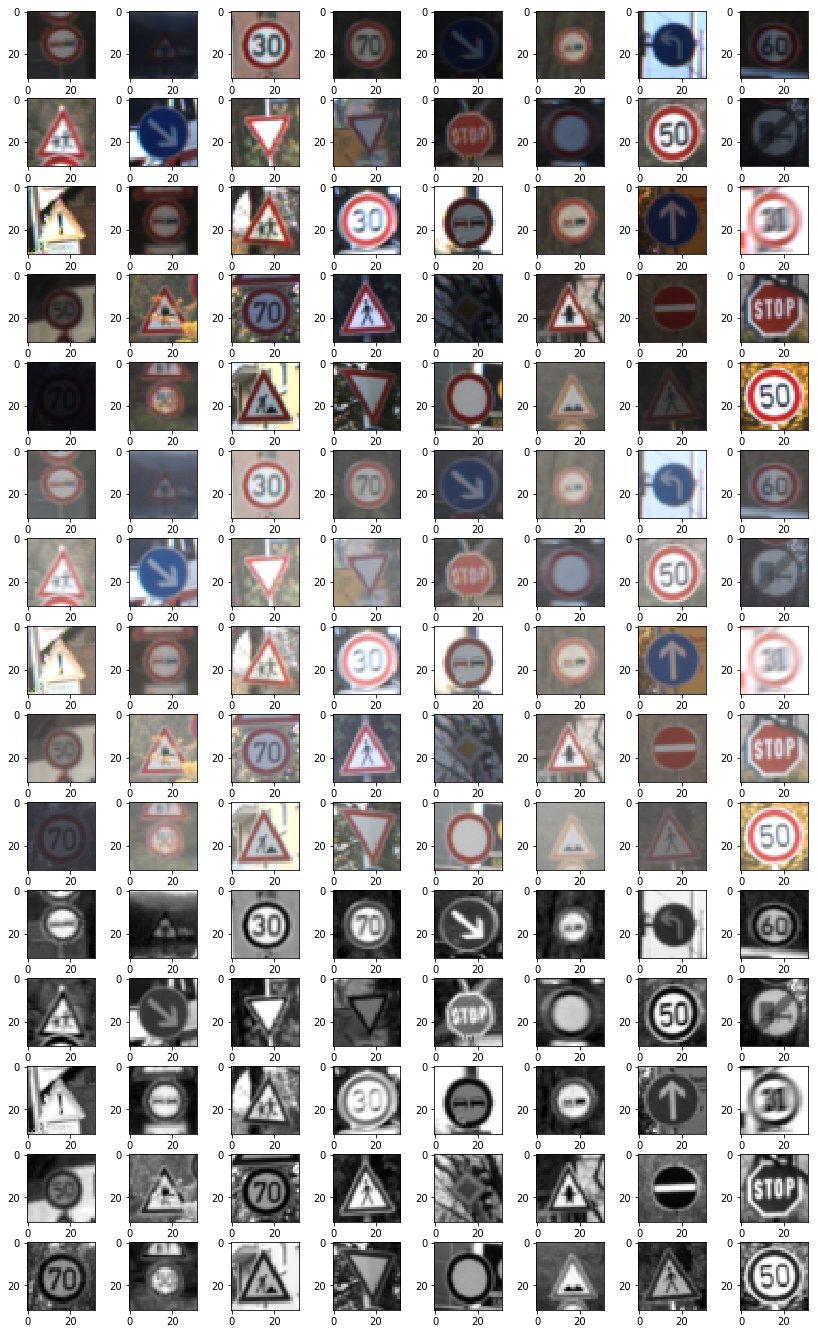

In [176]:
import numpy as np

plt.figure(figsize=[14,24]) # set image size
plt.subplots_adjust(wspace = 0.5)# set distance between the subplots

indices = np.arange(len(X_train_orig))
rnd_indices = np.random.choice(indices, size=40)



for i, image in enumerate(X_train_orig[rnd_indices]):
    plt.subplot(15,8,i+1)
    imgplot = plt.imshow(image)
    plt.subplot(15,8,40+i+1)
    #imgplot = plt.imshow(to_gray(adjust_gamma(image, gamma=2)), cmap="gray")
    imgplot = plt.imshow(adjust_gamma(image,2))
    plt.subplot(15,8,80+i+1)
    #imgplot = plt.imshow(to_gray(adjust_gamma(image, gamma=2)), cmap="gray")
    imgplot = plt.imshow(adjust_gamma(to_gray(image), gamma=2), cmap="gray")
plt.show()
 

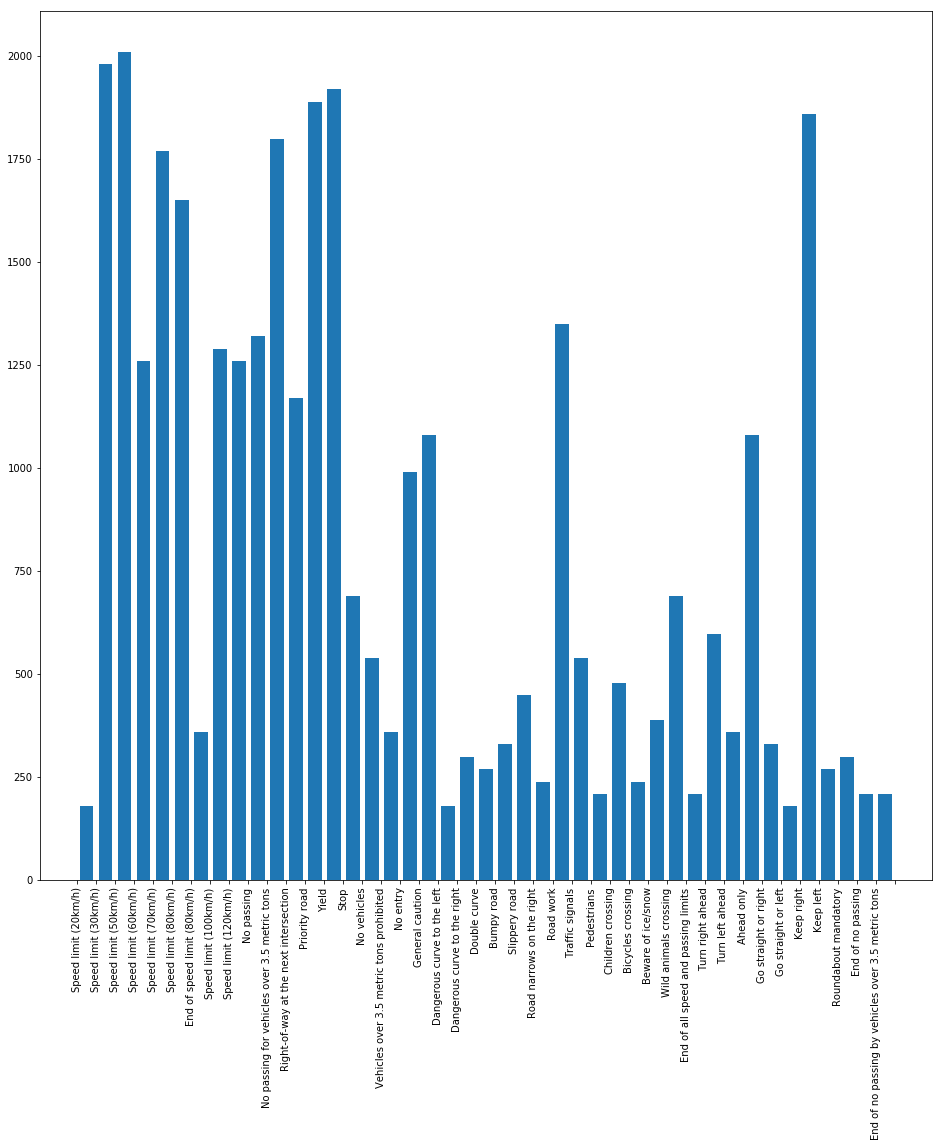

In [78]:

# histogram of label frequency
plt.figure(figsize=[16,16])
hist, bins = np.histogram(y_train_orig, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, tick_label=signnames)
plt.xticks(bins, signnames, rotation='vertical')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [79]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
#from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train, y_train)

In [80]:
def preprocessing(img):
    #return to_gray(adjust_gamma(img, gamma=2))
    #return to_gray(img)
    #return adjust_gamma(to_gray(img), gamma=2)
    return adjust_gamma(img, gamma=2)

In [81]:
#Preprocessing 
X_train_gamma = [preprocessing(image) for image in np.copy(X_train_orig)]
X_test_gamma = [preprocessing(image) for image in np.copy(X_test_orig)]
X_valid_gamma = [preprocessing(image) for image in np.copy(X_valid_orig)]

X_train_scaled = (np.array(X_train_gamma).astype(float) - 128)/128
X_test_scaled = (np.array(X_test_gamma).astype(float) - 128)/128
X_valid_scaled = (np.array(X_valid_gamma).astype(float) - 128)/128

if len(np.array(X_valid_scaled).shape) == 3:
    X_train_scaled = np.expand_dims(X_train_scaled, 3)
    X_test_scaled = np.expand_dims(X_test_scaled, 3)
    X_valid_scaled = np.expand_dims(X_valid_scaled, 3)

y_train = np.copy(y_train_orig)
y_valid = np.copy(y_valid_orig)
y_test = np.copy(y_test_orig)

### Model Architecture

In [82]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

In [83]:
from tensorflow.contrib.layers import flatten
from tensorflow.contrib.layers import batch_norm

def LeNet(input_placeholder, keep_prob, n_classes, channels=1):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32xchannels. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5, 5, channels, 6],mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(input_placeholder, conv1_w, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b 
    #Layer 1: Activation.
    conv1 = tf.nn.relu(conv1)
    #Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5, 5, 6, 16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1, 1, 1, 1], padding = 'VALID') + conv2_b
    #Layer 2: Activation.
    conv2 = tf.nn.relu(conv2)
    #Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)


    #Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID') 
    
    #Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool_2)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    #Activation.
    fc1 = tf.nn.relu(fc1)
    #Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)


    #Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    
    #Layer 4 Activation.
    fc2 = tf.nn.relu(fc2)
    #Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    
    #Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84, n_classes), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    
    return logits,  (conv1, conv2, fc1, fc2)

In [127]:
x = tf.placeholder(tf.float32, (None, 32, 32, X_valid_scaled.shape[3]), name="x_placeholder")
y = tf.placeholder(tf.int32, (None), name="y_placeholder")
one_hot_y = tf.one_hot(y, n_classes)

is_training = tf.placeholder(tf.bool, name="is_training_placeholder")
keep_prob = tf.placeholder(tf.float32, name="keep_prob_placeholder")

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [128]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

learning_rate = 0.001
logits, tfvars = LeNet(x, keep_prob, n_classes, channels=X_valid_scaled.shape[3])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [129]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [130]:
#Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=.2  
)
datagen.fit(X_train_scaled)

In [177]:
from sklearn.utils import shuffle
import time

EPOCHS = 60
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_scaled)
    steps = 0
    print("Training...")
    print()
    batch_len = len(X_train_scaled)/ BATCH_SIZE
    for i in range(EPOCHS):
        start_time = time.time()
        #X_train_scaled, y_train = shuffle(X_train_scaled, y_train)
        #for offset in range(0, num_examples, BATCH_SIZE):
        #    end = offset + BATCH_SIZE
        #    batch_x, batch_y = X_train_scaled[offset:end], y_train[offset:end]
        #    sess.run(training_operation, feed_dict={x: batch_x,y: batch_y, keep_prob: 0.5})
        #    steps += 1
        batches = 0
        for x_batch, y_batch in datagen.flow(X_train_scaled, y_train, batch_size=BATCH_SIZE):
            sess.run(training_operation, feed_dict={x: x_batch, y: y_batch, keep_prob: 0.5})
            steps += 1
            batches += 1
            if batches >= batch_len:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break
        training_accuracy = evaluate(X_train_scaled, y_train)
        validation_accuracy = evaluate(X_valid_scaled, y_valid)
        print("EPOCH {}: ... Train Acc.: {:.3f} Val. Acc.: {:.3f} Time: {}s. Steps: {}".format(i+1, training_accuracy, validation_accuracy, round(time.time() - start_time, 0), steps))
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1: ... Train Acc.: 0.497 Val. Acc.: 0.456 Time: 46.0s. Steps: 272
EPOCH 2: ... Train Acc.: 0.674 Val. Acc.: 0.635 Time: 41.0s. Steps: 544
EPOCH 3: ... Train Acc.: 0.797 Val. Acc.: 0.759 Time: 40.0s. Steps: 816
EPOCH 4: ... Train Acc.: 0.825 Val. Acc.: 0.779 Time: 38.0s. Steps: 1088
EPOCH 5: ... Train Acc.: 0.864 Val. Acc.: 0.822 Time: 44.0s. Steps: 1360
EPOCH 6: ... Train Acc.: 0.887 Val. Acc.: 0.838 Time: 43.0s. Steps: 1632
EPOCH 7: ... Train Acc.: 0.904 Val. Acc.: 0.861 Time: 39.0s. Steps: 1904
EPOCH 8: ... Train Acc.: 0.914 Val. Acc.: 0.872 Time: 40.0s. Steps: 2176
EPOCH 9: ... Train Acc.: 0.923 Val. Acc.: 0.875 Time: 43.0s. Steps: 2448
EPOCH 10: ... Train Acc.: 0.933 Val. Acc.: 0.889 Time: 47.0s. Steps: 2720
EPOCH 11: ... Train Acc.: 0.936 Val. Acc.: 0.902 Time: 43.0s. Steps: 2992
EPOCH 12: ... Train Acc.: 0.939 Val. Acc.: 0.905 Time: 44.0s. Steps: 3264
EPOCH 13: ... Train Acc.: 0.945 Val. Acc.: 0.910 Time: 43.0s. Steps: 3536
EPOCH 14: ... Train Acc.: 0.950 Val. 

In [178]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_scaled, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.951


In [179]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Confusion matrix on test dataset

INFO:tensorflow:Restoring parameters from ./lenet
Confusion matrix, without normalization
[[ 36   0   0 ...   0   0   0]
 [  0 672  26 ...   0   0   0]
 [  0   5 734 ...   0   0   0]
 ...
 [  0   1   0 ...  88   0   0]
 [  0   0   0 ...   0  54   0]
 [  0   0   0 ...   0   0  80]]
Normalized confusion matrix
[[0.6 0.  0.  ... 0.  0.  0. ]
 [0.  0.9 0.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.  0. ]
 [0.  0.  0.  ... 0.  0.9 0. ]
 [0.  0.  0.  ... 0.  0.  0.9]]


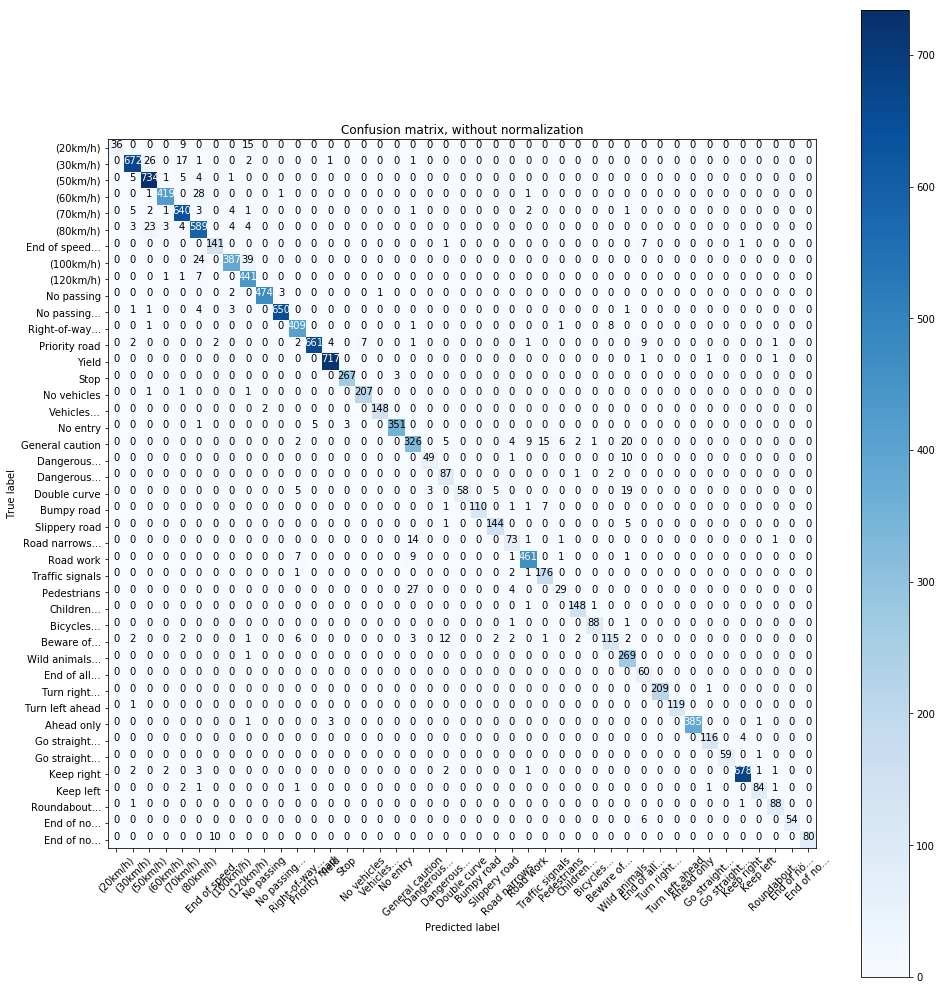

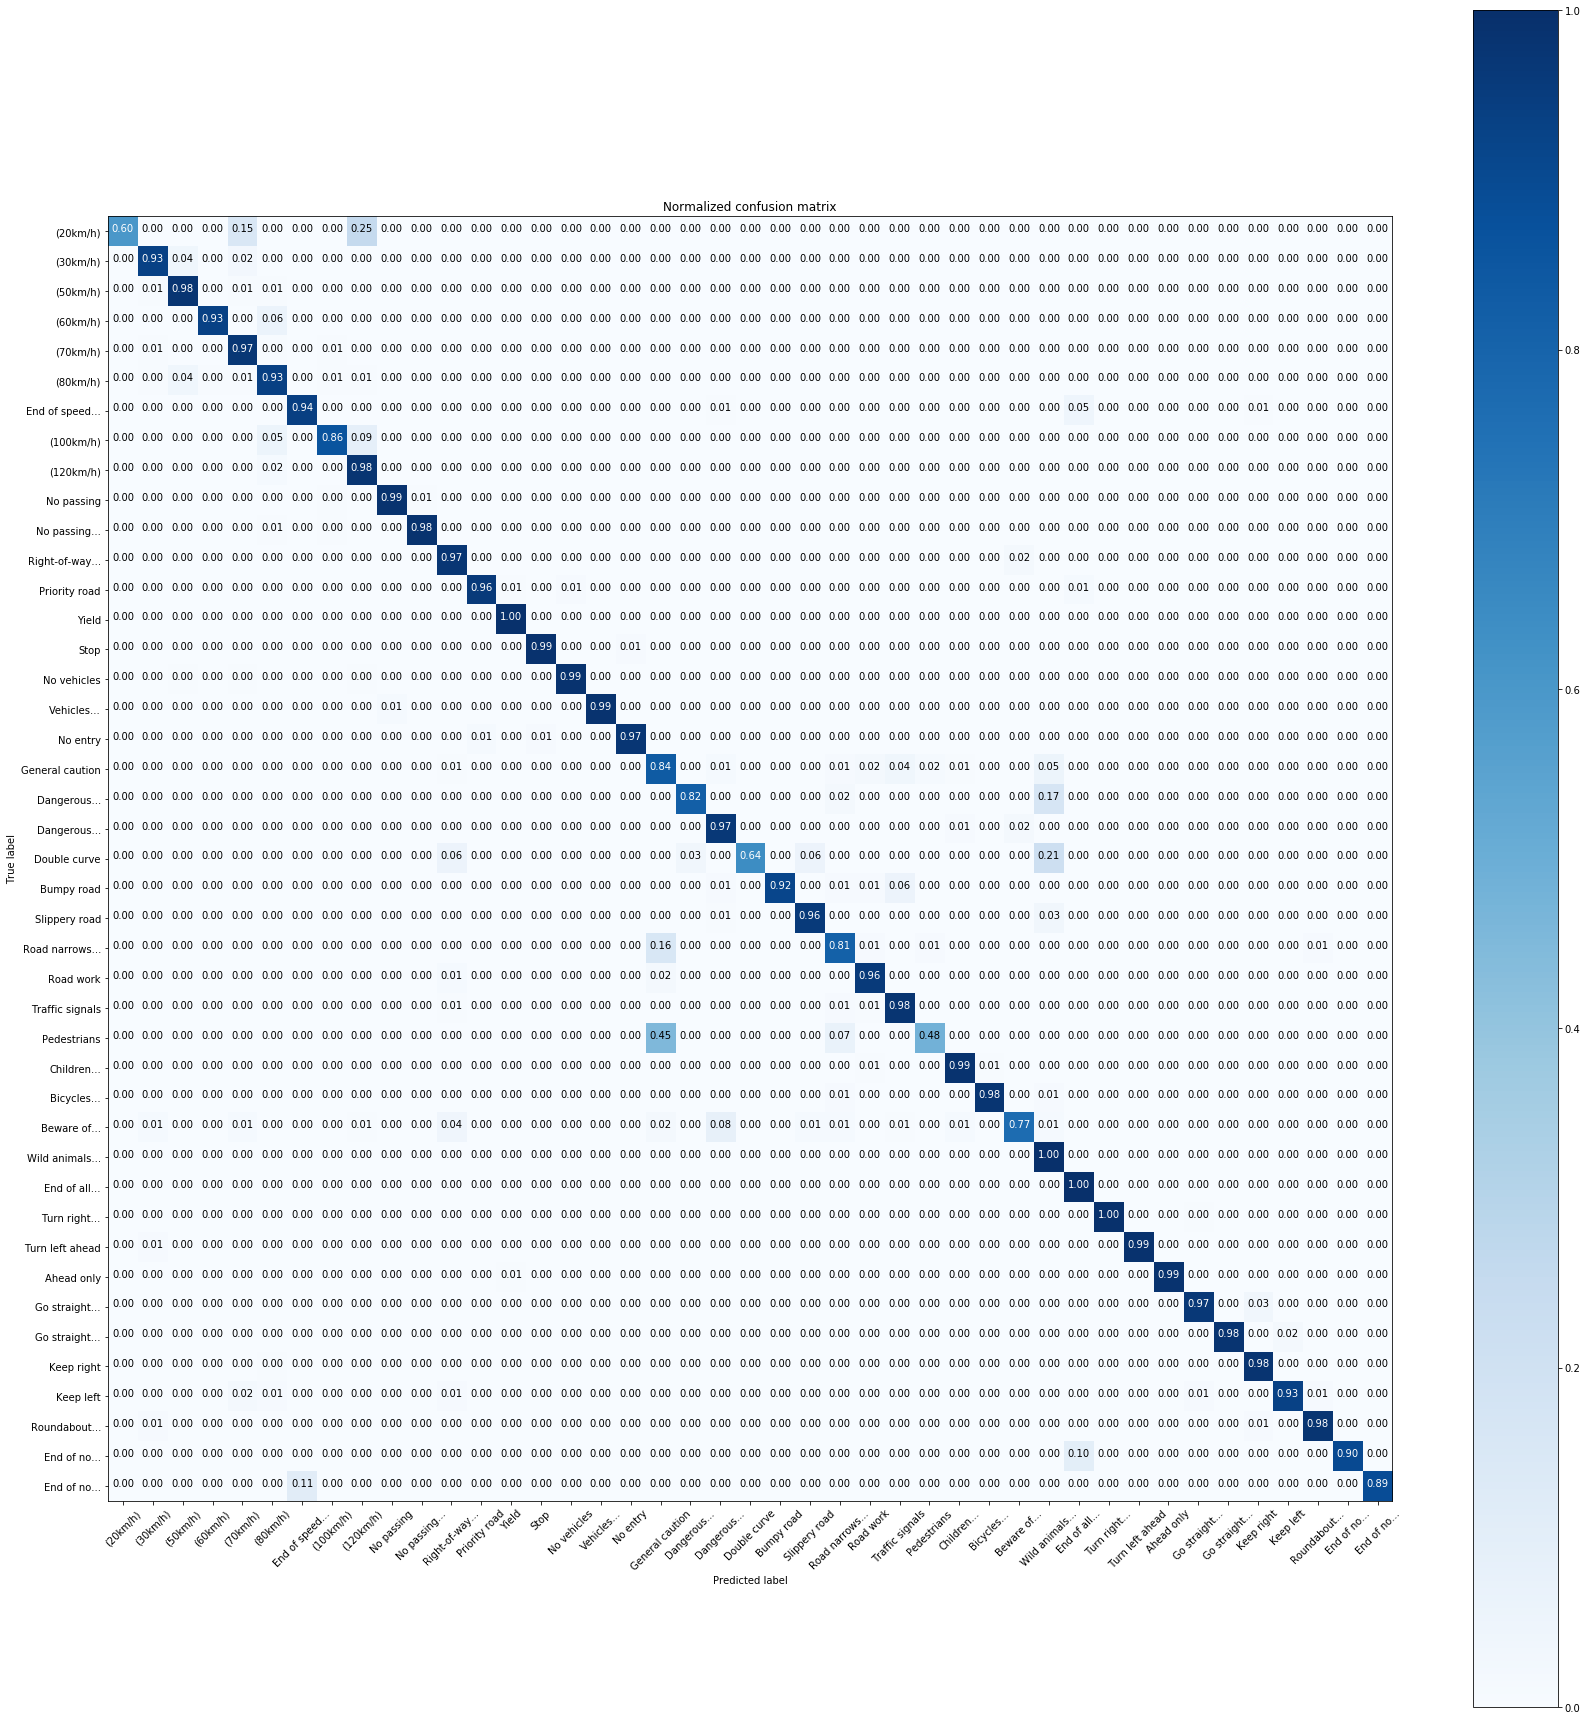

In [180]:
from sklearn.metrics import confusion_matrix
import itertools  
import textwrap

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred = sess.run(tf.argmax(logits,1), feed_dict={x: X_test_scaled, keep_prob: 1})

truncated_signnames = [textwrap.shorten(s.replace("Speed limit",""), width=15, placeholder="...") for s in signnames]

cnf_matrix = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=[14,14]) 
plot_confusion_matrix(cnf_matrix, classes=truncated_signnames,
                      title='Confusion matrix, without normalization')
np.set_printoptions(precision=1)
# Plot normalized confusion matrix
plt.figure(figsize=[24,24]) 
plot_confusion_matrix(cnf_matrix, classes=truncated_signnames, normalize=True,
                      title='Normalized confusion matrix')

np.set_printoptions(precision=None)
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

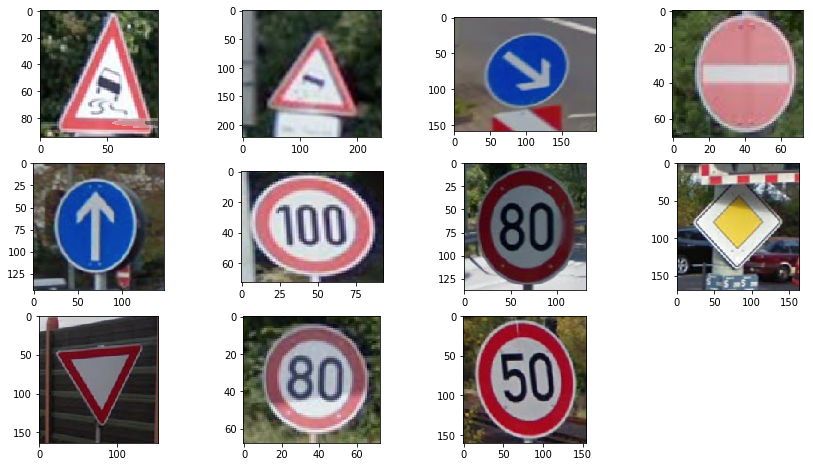

In [195]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import cv2
imgs_glob = './test_images/*'
imgs_path = glob.glob(imgs_glob)
i = 0
plt.figure(figsize=[14,22]) # set image size
plt.subplots_adjust(wspace = 0.5)# set distance between the subplots
images = []
for fname in imgs_path:
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    plt.subplot(8,4,i+1)
    imgplot = plt.imshow(img)
    i+=1
    images.append(img)
    
plt.show()
 

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet


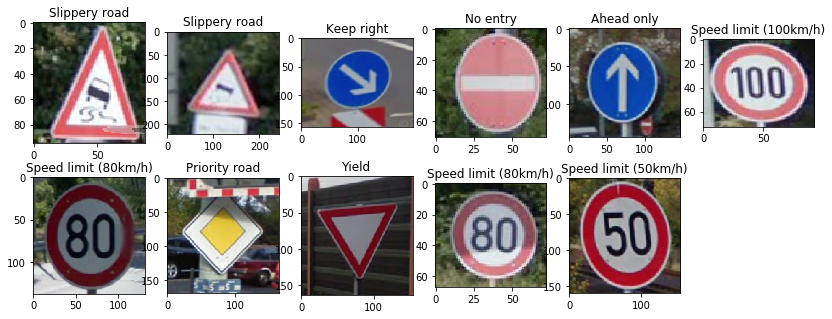

In [201]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

images_norm = [preprocessing(cv2.resize(img, (32, 32))) for img in images]
images_scaled = (np.array(images_norm).astype(float) - 128)/128
if len(images_scaled.shape) == 3:
    images_scaled = np.expand_dims(images_scaled, 3)
    
softmax = tf.nn.softmax(logits)



i = 0
plt.figure(figsize=[14,22]) 
for (image, prediction) in zip(images,predictions):
    a = plt.subplot(8,6,i+1)
    imgplot = plt.imshow(image)
    i+=1
    a.set_title(signnames[prediction])
    
    


### Analyze Performance

In [197]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print('Accuracy: {:.0f}%'.format(100*11/11))

Accuracy: 100%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [202]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(tf.nn.top_k(softmax,k=3), feed_dict={x: images_scaled, keep_prob: 1})

i = 0

print()
for (path, values, indices) in zip(imgs_path,predictions.values,predictions.indices):
    print(path[14:]) 
    print("1st ", signnames[indices[0]], values[0])
    print("2nd ", signnames[indices[1]], values[1])
    print("3rd ", signnames[indices[2]], values[2])
    print()
    
    


INFO:tensorflow:Restoring parameters from ./lenet

10_slippery_road.png
1st  Slippery road 0.47448257
2nd  Dangerous curve to the left 0.25787917
3rd  Wild animals crossing 0.16625506

9_slippery_road.png
1st  Slippery road 0.8457679
2nd  Dangerous curve to the left 0.08005107
3rd  Wild animals crossing 0.04296077

4_error_reporting.png
1st  Keep right 0.99905735
2nd  Go straight or right 0.00070822827
3rd  Turn left ahead 0.00021951033

3_no_entry.png
1st  No entry 0.94102347
2nd  Stop 0.058901753
3rd  Yield 1.7398934e-05

1_ahead_only.png
1st  Ahead only 0.99634945
2nd  Go straight or right 0.0033083507
3rd  Turn left ahead 0.00026016386

7_speed_limit_100.png
1st  Speed limit (100km/h) 0.33779764
2nd  Speed limit (80km/h) 0.17523673
3rd  Speed limit (30km/h) 0.16399518

5_speed_limit_80.png
1st  Speed limit (80km/h) 0.8426207
2nd  Speed limit (60km/h) 0.10409802
3rd  Speed limit (50km/h) 0.04300775

2_priority_road.png
1st  Priority road 0.99999845
2nd  No passing for vehicles over 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [184]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob: 1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

            
def printFeatures(index):            
    img = X_test_orig[index]

    plt.figure(0, figsize=(4,4))
    plt.subplot(1,2, 1)
    plt.imshow(img)
    img = preprocessing(img)
    plt.subplot(1,2, 2)
    plt.imshow(img, cmap="gray")
    img = (np.array([img]).astype(float) - 128)/128
#    img = np.expand_dims(img, axis=0)
    outputFeatureMap(img, tfvars[0], plt_num=1)
    outputFeatureMap(img, tfvars[1], plt_num=2)
 
    
    
    
    

INFO:tensorflow:Restoring parameters from ./lenet


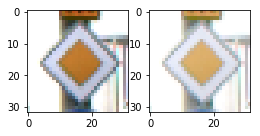

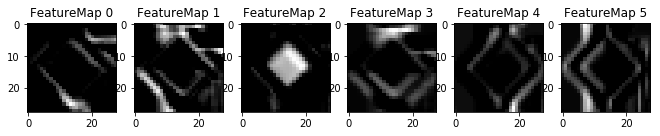

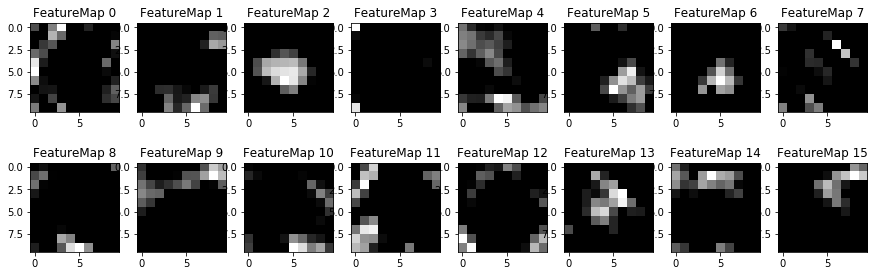

In [199]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    printFeatures(11681)

INFO:tensorflow:Restoring parameters from ./lenet


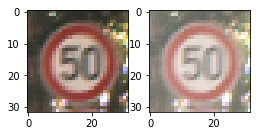

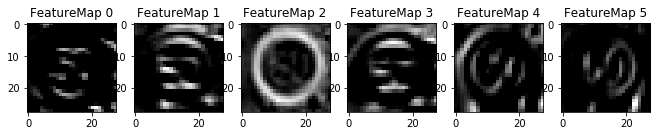

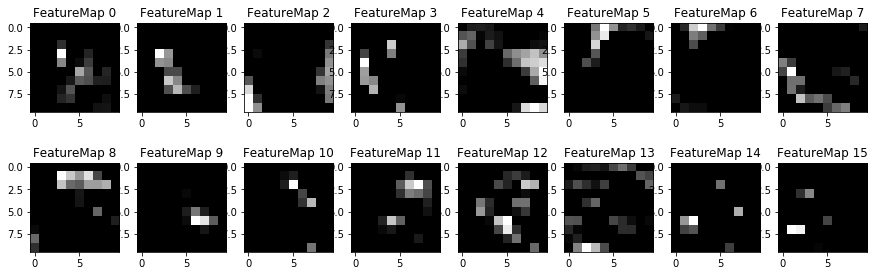

In [186]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    printFeatures(1037)

INFO:tensorflow:Restoring parameters from ./lenet


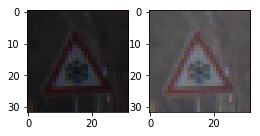

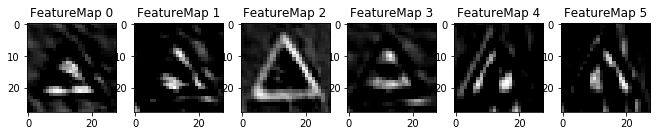

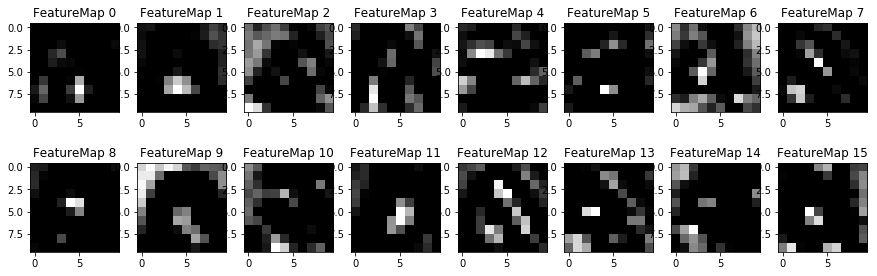

In [187]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    printFeatures(2072)

INFO:tensorflow:Restoring parameters from ./lenet


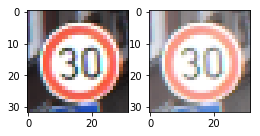

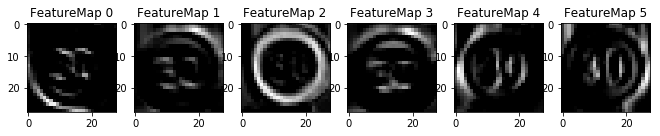

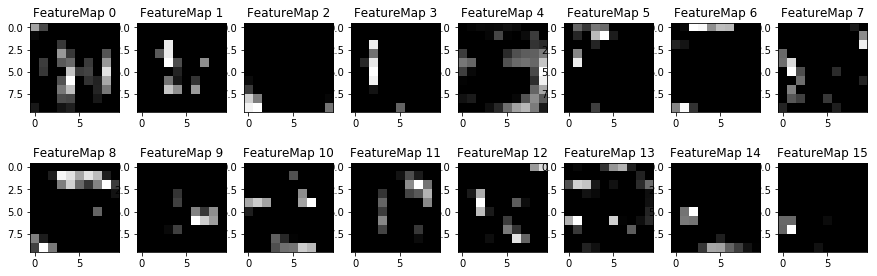

In [188]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    printFeatures(9634)

INFO:tensorflow:Restoring parameters from ./lenet


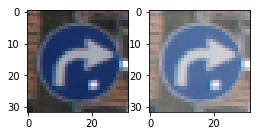

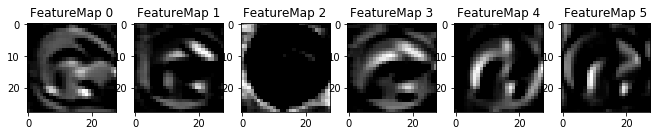

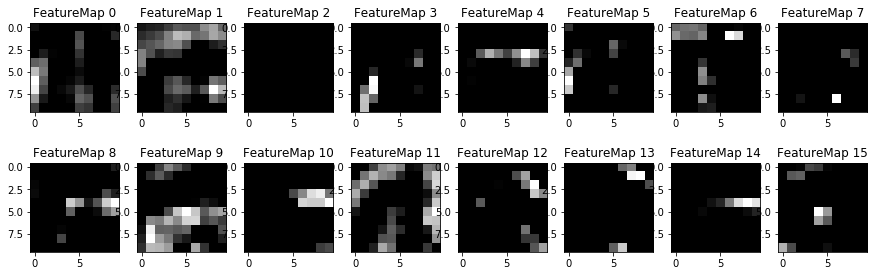

In [189]:
 with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    printFeatures(296)


INFO:tensorflow:Restoring parameters from ./lenet


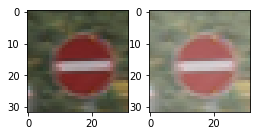

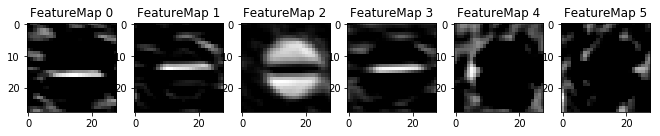

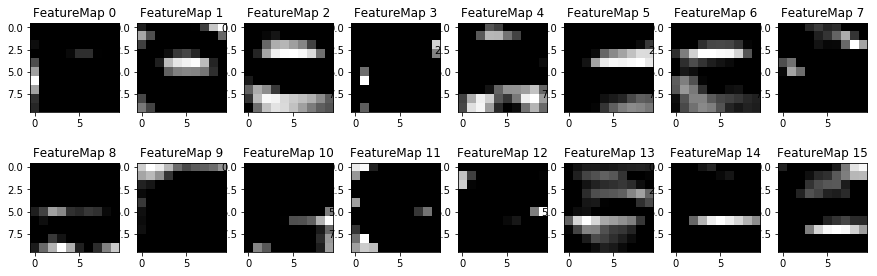

In [190]:
 with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    printFeatures(10821)

INFO:tensorflow:Restoring parameters from ./lenet
11242


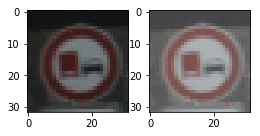

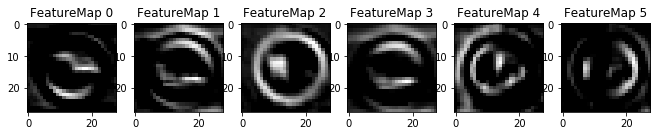

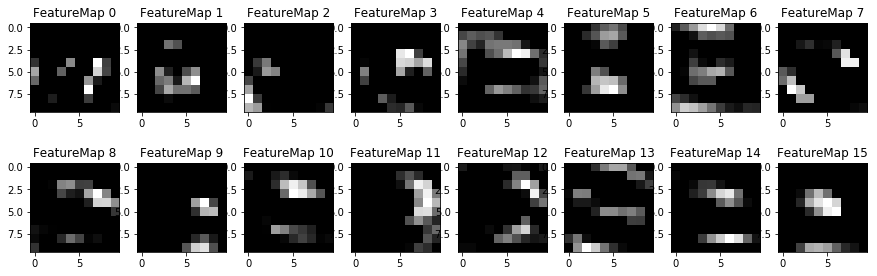

In [191]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    index = int(np.random.random() * X_test_orig.shape[0])
    print(index)
    printFeatures(index)
